In [4]:
import sys
sys.path.append( '../utilities' )
from data_engine import DataEngine
from backtesting import Backtesting
import pandas as pd
import ta
import ccxt
import json
f = open('../database/pair_list.json',)
pairJson = json.load(f)
f.close()

In [24]:
pairList = pairJson['hitbtc2018']
# pairList = pairJson['ftxClassicPair']
timeframe = '1h'
startDate = '2017-01-01T00:00:00'

dataEngine = DataEngine(session=ccxt.hitbtc())

dfList = []
for pair in pairList:
    df = dataEngine.get_historical_from_db(pair, timeframe, startDate)
    dfList.append(df)

print("Data load 100%")
dfList[0]

Successfully load 41435 candles for BTCUSDT
Successfully load 39909 candles for ETHUSDT
Successfully load 40418 candles for LTCUSDT
Successfully load 31562 candles for ADAUSDT
Successfully load 35734 candles for TRXUSDT
Successfully load 37744 candles for ETCUSDT
Successfully load 20669 candles for ENJUSDT
Successfully load 34779 candles for XRPUSDT
Successfully load 39253 candles for ZECUSDT
Successfully load 39256 candles for DOGEUSDT
Successfully load 38471 candles for XTZUSDT
Successfully load 39919 candles for DASHUSDT
Successfully load 39839 candles for XMRUSDT
Successfully load 38629 candles for EOSUSDT
Successfully load 30184 candles for IOTAUSDT
Successfully load 39236 candles for XEMUSDT
Successfully load 28218 candles for QTUMUSDT
Successfully load 30647 candles for XLMUSDT
Successfully load 36031 candles for NEOUSDT
Successfully load 37464 candles for ZRXUSDT
Successfully load 28215 candles for OMGUSDT
Successfully load 32836 candles for XVGUSDT
Successfully load 35771 cand

,open,high,low,close,volume
timestamp,,,,,
2017-01-01 00:00:00,962.04,962.04,962.04,962.04,0.02000
2017-01-01 06:00:00,960.38,960.38,959.71,959.71,0.12000
2017-01-01 11:00:00,971.47,971.47,971.47,971.47,0.01000
2017-01-01 12:00:00,967.84,967.84,967.84,967.84,0.01000
2017-01-01 13:00:00,967.84,967.84,967.84,967.84,0.01000
...,...,...,...,...,...
2021-11-24 15:00:00,56120.18,57163.98,56091.20,56761.18,588.51446
2021-11-24 16:00:00,56723.20,56874.38,56576.02,56619.83,1223.63101
2021-11-24 17:00:00,56620.76,56772.66,56494.35,56537.00,1378.19136


In [25]:
# -- Indicator variable --
aoParam1 = 6
aoParam2 = 22
stochWindow = 14
willWindow = 14

# -- Drop all columns we do not need --
for df in dfList:
    # -- Drop all columns we do not need --
    df.drop(columns=df.columns.difference(['open','high','low','close','volume']), inplace=True)

    # -- Indicators, you can edit every value --
    df['AO']= ta.momentum.awesome_oscillator(df['high'],df['low'],window1=aoParam1,window2=aoParam2)

    df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=stochWindow)

    df['WillR'] = ta.momentum.williams_r(high=df['high'], low=df['low'], close=df['close'], lbp=willWindow)

print("Indicators loaded 100%")
dfList[0]

Indicators loaded 100%


,open,high,low,close,volume,AO,STOCH_RSI,WillR
timestamp,,,,,,,,
2017-01-01 00:00:00,962.04,962.04,962.04,962.04,0.02000,NaN,NaN,NaN
2017-01-01 06:00:00,960.38,960.38,959.71,959.71,0.12000,NaN,NaN,NaN
2017-01-01 11:00:00,971.47,971.47,971.47,971.47,0.01000,NaN,NaN,NaN
2017-01-01 12:00:00,967.84,967.84,967.84,967.84,0.01000,NaN,NaN,NaN
2017-01-01 13:00:00,967.84,967.84,967.84,967.84,0.01000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-11-24 15:00:00,56120.18,57163.98,56091.20,56761.18,588.51446,-427.250379,1.000000,-41.688558
2021-11-24 16:00:00,56723.20,56874.38,56576.02,56619.83,1223.63101,-385.336439,0.838720,-51.041867
2021-11-24 17:00:00,56620.76,56772.66,56494.35,56537.00,1378.19136,-330.768864,0.743132,-56.522832


In [26]:
dfTestList = []
for df in dfList:
    dfTestList.append(df.loc['2018-01-01':])

# -- Starting value --
startingBalance = 1000
makerFee = 0
takerFee = 0.0007

# -- Rules --
StopLossActivation = False
takeProfitActivation = True
showLog = False

# -- Hyper parameters --
stochOverBought = 0.8
stochOverSold = 0.2
SlPct = 0.015
TpPct = 0.15
maxShop = 35
maxPositions = 4

# -- Trade Functions --

# -- Condition to BUY market --
def buyCondition(row, previousRow=None):
    if (
        row['AO'] >= 0
        and row['WillR'] < -85
    ):
        return True
    else:
        return False

# -- Condition to SELL market --
def sellCondition(row, previousRow=None):
    if (
        (row['AO'] < 0
        and row['STOCH_RSI'] > stochOverSold)
        or row['WillR'] > -10
    ):
        return True
    else:
        return False

# -- Value initialisation --
usd = startingBalance
wallet = startingBalance
stopLoss = [0] * len(pairList)
takeProfit = [5000000] * len(pairList)
walletCoinArray = [0] * len(pairList)
walletUsdArray = [0] * len(pairList)
activePositions = 0
lastIndex = dfTestList[0].index.values[1]

# -- Definition of dfTrades, that will be the dataset to do your trades analyses --
dfTrades = None
dfTrades = pd.DataFrame(columns=['date', 'symbol','position', 'reason',
                                 'price', 'frais', 'fiat', 'coins', 'wallet'])

# # -- Iteration on all your price dataset (df) --
for index, row in dfTestList[0].iterrows():
    # -- Check if you have one coin in your wallet --
    if (walletCoinArray.count(0) == len(walletCoinArray)) == False:
        # -- Iteration on all coin (upgrade possible: only check coin in your wallet) --
        for i in range(0,len(dfTestList)):
            # -- Check if you have more than 0 coin --
            if walletCoinArray[i] != 0:
                try:
                    actualRow = dfTestList[i].loc[index]
                    # previousRow = dfTestList[i].loc[lastIndex]
                                    # -- Stop Loss --
                    if actualRow['low'] < stopLoss[i] :
                        sellPrice = stopLoss[i]
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell COIN at Stop Loss", sellPrice, '$ the', index)

                        # -- Add the trade to dfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Stop Loss',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)

                    # -- Take Profit --
                    elif actualRow['high'] > takeProfit[i] :
                        sellPrice = takeProfit[i]
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell COIN at Take Profit", sellPrice, '$ the', index)

                        # -- Add the trade to dfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Take Profit',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)

                    # -- Sell Market --
                    elif sellCondition(actualRow):
                        sellPrice = actualRow['close']
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell", pairList[i],"at", sellPrice, '$ the', index)

                        # -- Add the trade to DfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Market Order',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)
                except:
                    pass
    # -- Buy market order --
    # -- Check if you can open a new position --
    if activePositions < maxPositions:
        # -- Check buy condition for each coin of list --
        for i in range(0,len(dfTestList)):
            try:
                actualRow = dfTestList[i].loc[index]
                # previousRow = dfTestList[i].loc[lastIndex]
                # -- Buy condition --
                if buyCondition(actualRow) and activePositions < maxPositions and walletCoinArray[i]==0 :
                    buyPrice = actualRow['close']
                    # -- Define size of the position --
                    usdMultiplier = 1/(maxPositions-activePositions)
                    fee = takerFee * usd * usdMultiplier
                    usd = usd - fee
                    coin = (usd * usdMultiplier) / buyPrice
                    usd = usd - (usd * usdMultiplier)
                    # -- Set coin and equivalent usd to size of position after open position --
                    walletCoinArray[i] = coin
                    walletUsdArray[i] = coin * actualRow['close']
                    activePositions += 1
                    # -- Create a Stop Loss --
                    if StopLossActivation:
                        stopLoss[i] = buyPrice - SlPct * buyPrice
                    # -- Create a Take Profit --
                    if takeProfitActivation:
                        takeProfit[i] = buyPrice + TpPct * buyPrice

                    # -- LOG --
                    if showLog:
                        print("Buy", pairList[i],"at", buyPrice, '$ the', index)

                    # -- Add the trade to dfTrades to analyse it later --
                    myrow = {
                        'date': index,
                        'symbol': pairList[i],
                        'position': "Buy",
                        'reason': 'Buy Market Order',
                        'price': buyPrice,
                        'frais': fee,
                        'fiat': usd,
                        'coins': coin,
                        'wallet': sum(walletUsdArray) + usd
                    }
                    dfTrades = dfTrades.append(myrow, ignore_index=True)
            except:
                pass

    # -- Keep last index to define last row --            
    lastIndex = index

print("Final wallet", sum(walletUsdArray) + usd)


Final wallet 162633.07988823205


In [27]:
BTobject = Backtesting()
newDf = BTobject.multi_spot_backtest_analys(dfTrades=dfTrades, dfTest=dfTestList[0], pairList=pairList, timeframe=timeframe)

Trading Bot on : 24 coins | Timeframe : 1h
Period : [2018-01-01 00:00:00] -> [2021-11-24 19:00:00]
Starting balance : 999.825 $

----- General Informations -----
Final balance : 162633.08 $
Performance vs US Dollar : 16166.15 %
Bitcoin Buy and Hold Performence : 318.44 %
Performance vs Buy and Hold : 4976.71 %
Best trade : +4.1 %, the 2018-01-14 11:00:00
Worst trade : -10.78 %, the 2018-02-05 21:00:00
Worst drawDown : - 38.18 %
Total fees :  53087.18 $

----- Trades Informations -----
Total trades on period : 6964
Number of positive trades : 4610
Number of negative trades :  2354
Trades win rate ratio : 66.2 %
Average trades performance : 0.09 %
Average positive trades : 0.4 %
Average negative trades : -0.5 %

----- Trades Reasons -----
Buy Market Order     6964
Sell Market Order    6923
Sell Take Profit       41
Name: reason, dtype: int64

----- Pair Result -----
-----------------------------------------------------------------------------------------------
Trades      Pair     Sum-re

----- 2018 Performances: 518.1% -----


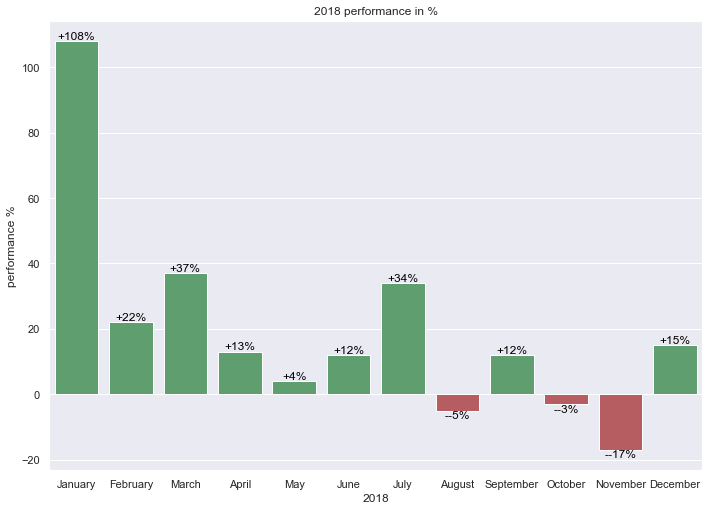

----- 2019 Performances: 141.72% -----


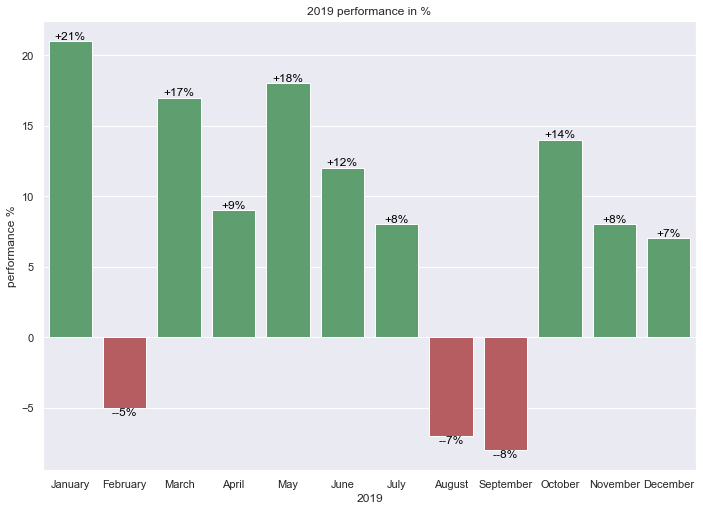

----- 2020 Performances: 317.5% -----


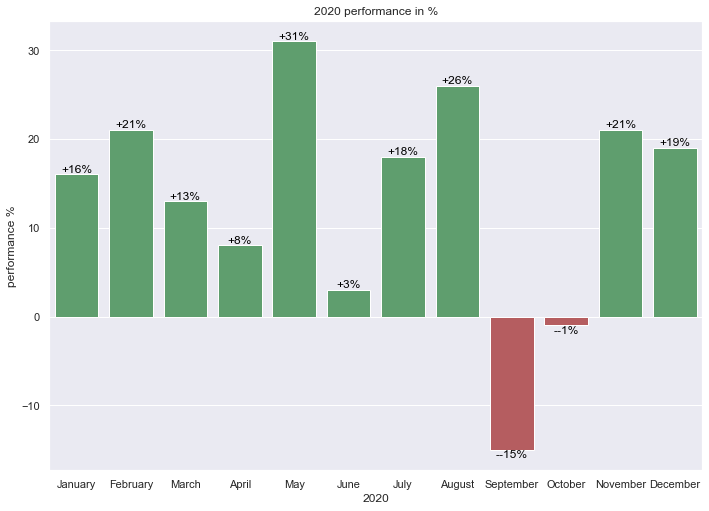

----- 2021 Performances: 159.51% -----


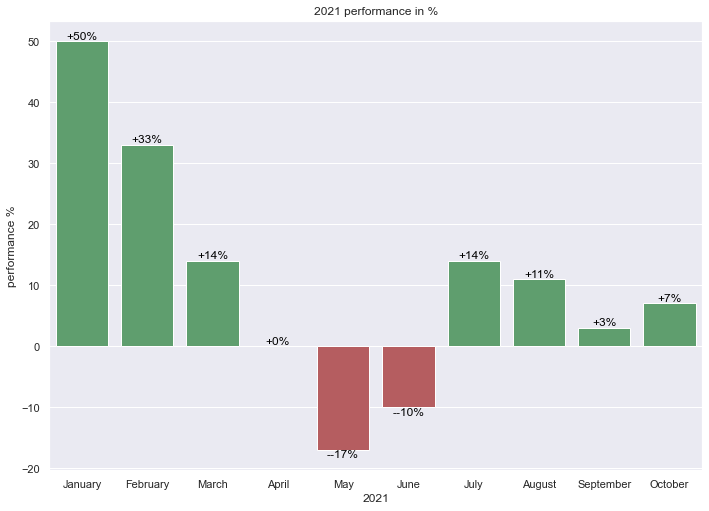

In [28]:
BTobject.plot_bar_by_month(dfTrades=dfTrades)

C:\Users\tl170571\AppData\Local\Temp/ipykernel_34376/3056460112.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  BTobject.plot_wallet_evolution(dfTrades=newDf['2021'])



----- Plot -----


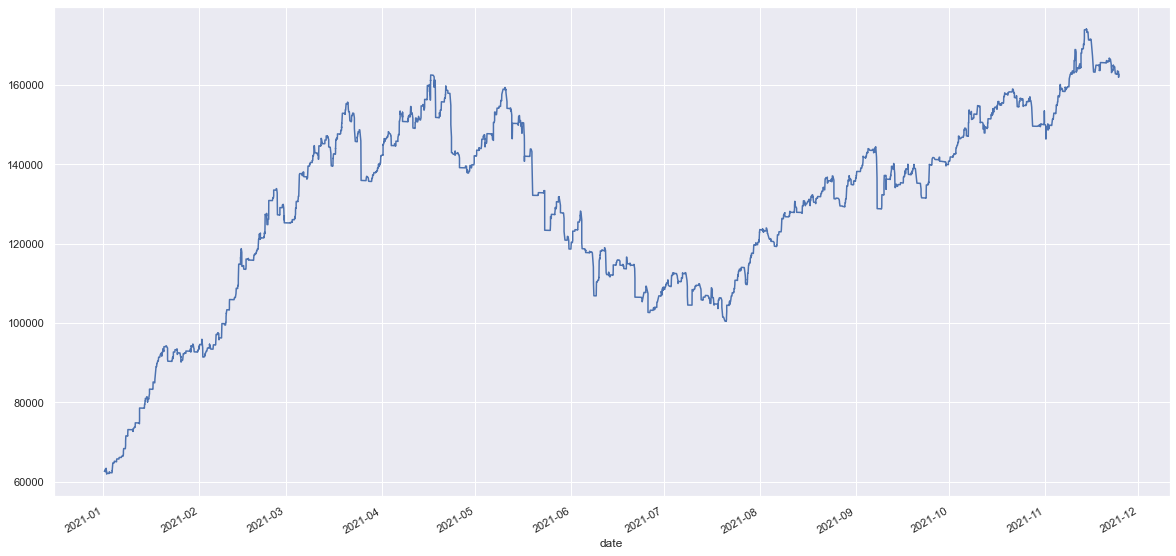

In [29]:
BTobject.plot_wallet_evolution(dfTrades=newDf['2021'])

In [8]:
dfTrades.iloc[-10:]

,date,symbol,position,reason,price,frais,fiat,coins,wallet
3572,2021-12-08 12:00:00,CRV/USD,Sell,Sell Market Order,3.908600,0.000000,1542.979266,0.000000,2054.368074
3573,2021-12-08 14:00:00,LTC/USD,Sell,Sell Market Order,165.510000,0.000000,2077.491181,0.000000,2077.491181
3574,2021-12-09 00:00:00,MATIC/USD,Buy,Buy Market Order,2.356116,0.363561,1557.845715,220.397427,2077.127620
3575,2021-12-09 03:00:00,LINK/USD,Buy,Buy Market Order,21.688500,0.363497,1038.321478,23.937144,2076.764122
3576,2021-12-09 03:00:00,UNI/USD,Buy,Buy Market Order,17.689000,0.363413,518.979033,29.339083,2076.400710
3577,2021-12-09 03:00:00,SRM/USD,Buy,Buy Market Order,4.176000,0.363285,0.000000,124.189595,2076.037425
3578,2021-12-09 07:00:00,LINK/USD,Sell,Sell Market Order,22.036500,0.000000,527.490865,0.000000,2084.367551
3579,2021-12-09 07:00:00,MATIC/USD,Sell,Sell Market Order,2.348924,0.000000,1045.187672,0.000000,2082.782452
3580,2021-12-09 07:00:00,LRC/USD,Buy,Buy Market Order,2.511450,0.365816,522.410928,208.011678,2082.416637
3581,2021-12-09 09:00:00,BNB/USD,Buy,Buy Market Order,593.951000,0.365688,0.000000,0.878937,2082.050949
